In [1]:
train_file_path = r"C:\Users\HP\Desktop\ML PROJECTS\project006\housing\artifact\data_ingestion\2022-11-21-01-32\ingested_data\train\housing.csv"

In [2]:
import pandas as pd


In [3]:
train_file_path

'C:\\Users\\HP\\Desktop\\ML PROJECTS\\project006\\housing\\artifact\\data_ingestion\\2022-11-21-01-32\\ingested_data\\train\\housing.csv'

In [4]:
df = pd.read_csv(train_file_path)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [6]:
df.shape

(16512, 10)

In [7]:
x,y = df.drop(columns = 'median_house_value', axis=1), df['median_house_value']

In [8]:
x.shape

(16512, 9)

In [9]:
y.shape

(16512,)

In [10]:
x.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [11]:
 x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
num_columns = x.drop(columns="ocean_proximity", axis=1)

In [14]:
num_columns.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [15]:
simple_imputer = SimpleImputer(strategy= "median")

In [16]:
df = simple_imputer.fit_transform(num_columns)

In [17]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [18]:
simple_imputer.statistics_ #median values for every feature

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [19]:
x.longitude.median()

-118.51

In [20]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [21]:
simple_imputer = SimpleImputer(strategy="most_frequent")

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

In [23]:
# Custom transformer 
class FeatureGenerator():
    def __init__(self, strategy="median"):
        self.strategy = strategy
        

    def fit(self,X):
        self.features_ = X.columns
        self.statistic_ = []
        for column in X.columns:
            self.statistic_.append(X[column].median())

    def transform(self, X:pd.DataFrame):
        for column in X.columns:
            X[column].fillna(self.statistic_)
        return X

    def fit_transform(self, x):
        self.fit(X)
        return self.transform(X)

In [24]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [25]:
for idx, column in enumerate(x.columns):
    print(idx, column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [26]:
# Custom transformer 
class Test(BaseEstimator, TransformerMixin):
    def __init__(self, strategy="median"):
        self.strategy = strategy
        

    def fit(self,X):
        self.features_ = X.columns
        self.statistic_ = []
        for column in X.columns:
            self.statistic_.append(X[column].median())
        return self 



    def transform(self, X:pd.DataFrame):
        for column in X.columns:
            X[column].fillna(self.statistic_)
        return X

In [27]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [28]:
num_columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [29]:
respons = Test().fit(num_columns)

In [30]:
respons.statistic_

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

In [31]:
respons.get_params

<bound method BaseEstimator.get_params of Test()>

In [32]:
respons.features_

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [33]:
sum(x["total_bedrooms"]) #/ sum(x["total_rooms"])

nan

In [34]:
x.total_bedrooms.index.stop / x.total_rooms.index.stop

1.0

In [35]:
# column.index('x.latitude')

In [36]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [37]:
import numpy as np

In [38]:

COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns  
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise e

In [39]:
arr1 = np.arange(10)
arr2 = np.arange(10)

In [40]:
np.c_[arr1, arr2]

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [42]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('feature_generator', FeatureGenerator()),
    ('scaling', StandardScaler(with_mean=False))
])

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
cat_pipeline = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('oneHotEncoder', OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))
 ])

In [45]:
df = pd.read_csv(train_file_path)

In [46]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [47]:
num_column_name = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       ]

cat_column_name = ['ocean_proximity']

In [48]:
preprocessing = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_column_name),
    ('cat_pipeline', cat_pipeline, cat_column_name)
])

In [62]:
train_df = preprocessing.fit_transform(df)

In [63]:
train_df

array([[-60.67637885,  18.01769717,   2.30626612, ...,   0.        ,
          0.        ,   0.        ],
       [-58.56324628,  15.4778193 ,   0.55668493, ...,   0.        ,
          0.        ,   2.9869105 ],
       [-59.46744721,  16.54428736,   3.4991624 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.3058226 ,  17.98027724,   3.81726807, ...,   0.        ,
          0.        ,   0.        ],
       [-61.29583143,  17.91946985,   1.11336985, ...,   0.        ,
          0.        ,   0.        ],
       [-61.01607865,  18.69593344,   2.14721329, ...,   0.        ,
          0.        ,   0.        ]])

In [50]:
test_file_path = r"C:\Users\HP\Desktop\ML PROJECTS\project006\housing\artifact\data_ingestion\2022-11-23-22-41\ingested_data\test\housing.csv"

In [51]:
test_df = pd.read_csv(test_file_path)

In [52]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
4123,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
4124,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
4125,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
4126,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


In [53]:
preprocessing.transform(test_df)

array([[-59.14273417,  15.95960092,   2.30626612, ...,   0.        ,
          0.        ,   0.        ],
       [-60.15683798,  16.31976777,   1.90863403, ...,   0.        ,
          0.        ,   0.        ],
       [-59.17270768,  16.02040831,   2.86295105, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.80714701,  16.10928065,   3.41963598, ...,   0.        ,
          0.        ,   0.        ],
       [-58.90294608,  15.73040384,   2.38579254, ...,   0.        ,
          0.        ,   0.        ],
       [-59.22765912,  15.99234336,   2.86295105, ...,   0.        ,
          0.        ,   0.        ]])

In [54]:
import dill

In [55]:
with open('preprocessing.pkl', "wb") as prep_file:
    dill.dump(preprocessing, prep_file)

In [56]:
with open('preprocessing.pkl', "rb") as file_obj:
    preprocessing_loaded_obj = dill.load(file_obj)

In [77]:
test_arr = preprocessing_loaded_obj.transform(test_df)

In [78]:
test_arr

array([[-59.14273417,  15.95960092,   2.30626612, ...,   0.        ,
          0.        ,   0.        ],
       [-60.15683798,  16.31976777,   1.90863403, ...,   0.        ,
          0.        ,   0.        ],
       [-59.17270768,  16.02040831,   2.86295105, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-59.80714701,  16.10928065,   3.41963598, ...,   0.        ,
          0.        ,   0.        ],
       [-58.90294608,  15.73040384,   2.38579254, ...,   0.        ,
          0.        ,   0.        ],
       [-59.22765912,  15.99234336,   2.86295105, ...,   0.        ,
          0.        ,   0.        ]])

In [60]:
from sklearn.linear_model import LinearRegression

In [64]:
train_df

array([[-60.67637885,  18.01769717,   2.30626612, ...,   0.        ,
          0.        ,   0.        ],
       [-58.56324628,  15.4778193 ,   0.55668493, ...,   0.        ,
          0.        ,   2.9869105 ],
       [-59.46744721,  16.54428736,   3.4991624 , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-61.3058226 ,  17.98027724,   3.81726807, ...,   0.        ,
          0.        ,   0.        ],
       [-61.29583143,  17.91946985,   1.11336985, ...,   0.        ,
          0.        ,   0.        ],
       [-61.01607865,  18.69593344,   2.14721329, ...,   0.        ,
          0.        ,   0.        ]])

In [66]:
x,y = train_df, np.array(df.median_house_value)

In [67]:
lr = LinearRegression()

In [68]:
lr.fit(x,y)

LinearRegression()

In [69]:
lr.coef_

array([-5.56496082e+04, -5.67115879e+04,  1.37347194e+04, -1.94306053e+03,
        7.34322496e+03, -4.57092980e+04,  4.54532868e+04,  7.47141630e+04,
        6.60458456e+03,  1.04304192e+03,  9.24832127e+03,  4.13327407e+13,
        3.87928108e+13,  9.16195387e+11,  2.62406173e+13,  2.78725714e+13])

In [70]:
lr.intercept_

-83252878480308.25

In [71]:
y_hat = lr.predict(x)

In [72]:
import matplotlib.pyplot as plt

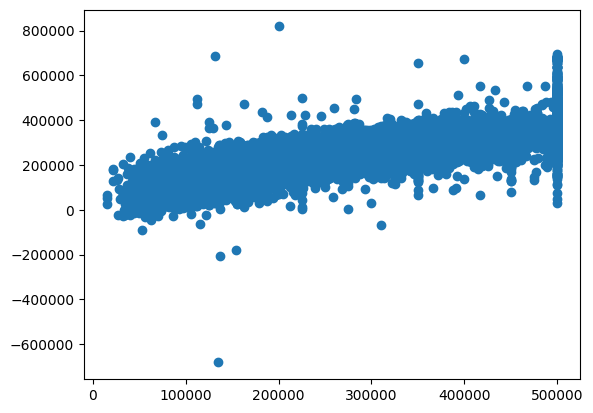

In [74]:
plt.plot(y,y_hat, "o")

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y,y_hat)

0.6481553597898262

In [79]:
yhat_test = lr.predict(test_arr)

In [80]:
y_test = np.array(test_df.median_house_value)

In [81]:
r2_score(y_test, yhat_test)

0.6564592986139832